### Importations

In [1]:
import numpy as np              # pour les tableaux
import matplotlib.pyplot as plt # pour les graphiques

## Définition de la fonction analytique

In [ ]:
def solu(t, E=1, tau=1):
    return E*(1-np.exp(-t/tau))

:::{note} Points
.5
:::

On étudie l'équation
$$
    \frac{{\rm d}u_C}{{\rm d}t} + \frac{u_C}{\tau} = \frac{e(t)}{\tau}
$$
que l'on peut réécrire
$$
    y' + y = e(t)
$$
en considérant $\tau = 1$s et qu'on ignore donc par simplification.

On peut isoler $y' = {\rm d}u_C/{\rm d}t$ pour trouver f :
$$
    \frac{{\rm d}u_C}{{\rm d}t} = \frac{e(t) - u_C(t)}{\tau}
$$
Pour étudier cette fonction par la méthode d'Euler, il faut définir l'entrée $e$ et la fonction $f(t,u_C(t))$.

### Définition de l'entrée `e(t)` et de la fonction `f`

In [3]:
def e(t, E=1):
    """
    La fonction d'entrée.
    Peut être égale à une constante :
    `return 10`
    Peut être égale à un sinus :
    `return np.sin(t)`
    """
    if t < 0:
        return 0
    else:
        return E       # à vous de compléter

def f(t, y, e, tau=1):
    """
    Donne la valeur de y', ici duC/dt, à partir de e, uC et t.
    """
    return (e(t) - y)/tau         # à compléter

:::{note} Points
.5
:::

### Définition de la fonction `euler`

In [4]:
def euler(f, y0, a, b, n):
    """
    Calcule les points suivants d'une fonction par une approximation
    tangentielle, sur l'intervalle de temps [a,b] à partir de l'ordonnée
    y0 et ce pour n points.
    """
    global list_t            # rend la liste des temps accessible en dehors de
                             # la fonction : nécessaire pour le tracé
    list_t = np.linspace(a, b, n) # créé la liste des temps
    h = (b-a) / n            # le pas temporel
    list_y = [y0]            # on initialise la liste avec la valeure mesurée
    yk = y0                  # on initialise le premier y_k avec y0
    tk = a                   # de même avec t_k = t_0
    for k in range(n-1):
        yk = yk + h*f(tk, yk, e) # à compléter   voir TP
        tk = a + k*h             # à compléter   voir TP
        list_y.append(yk)     # on ajoute la valeur de tk à la liste
    return list_y

:::{note} Points
1
:::

### Initalisation des valeurs

In [5]:
a = 0
b = 10
n = 1000
y0 = 0

### Test de résolution avec `e(t) = E`

In [6]:
list_y = euler(f, y0, a, b, n)

:::{note} Points
.5
:::

### Définition listes pour tracé de la solution analytique et fonction erreur

In [7]:
solu_y = solu(list_t)
erro_y = abs(solu_y - list_y)

:::{note} Points
.5
:::

### Tracé

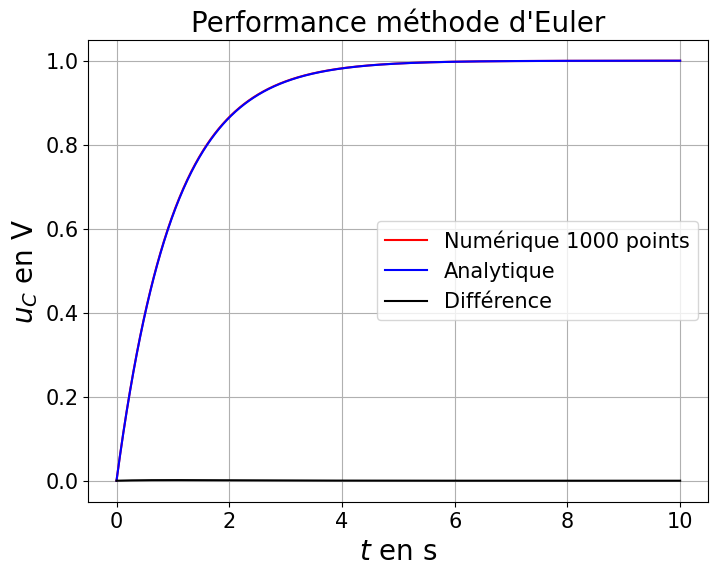

In [8]:
plt.figure(figsize=(8, 6))
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('$t$ en s', fontsize=20)
plt.ylabel('$u_C$ en V', fontsize=20)

plt.plot(list_t, list_y,
         'r', label=f'Numérique {n} points')
plt.plot(list_t, solu_y,
         'b', label='Analytique')
plt.plot(list_t, erro_y,
         'k', label='Différence')

# plt.scatter(list_t, list_y,
#             s=100, c='r', marker='+',
#             label=f'Résolution numérique avec {n} points')

plt.title("Performance méthode d'Euler",
          fontsize=20)
plt.legend(fontsize=15)
plt.show()

:::{note} Points
1
:::

# Différents pas de calcul

:::{note} Points
.5
:::

## Avec d'autres entrées

In [15]:
def e(t):
    """
    La fonction d'entrée.
    Peut être égale à une constante :
    `return 10`
    Peut être égale à un sinus :
    `return np.sin(t)`
    """
    return np.exp(t)   # à compléter

list_t = np.linspace(a, 100, n)
list_y = euler(f, y0, a, 100, n)

### Tracé

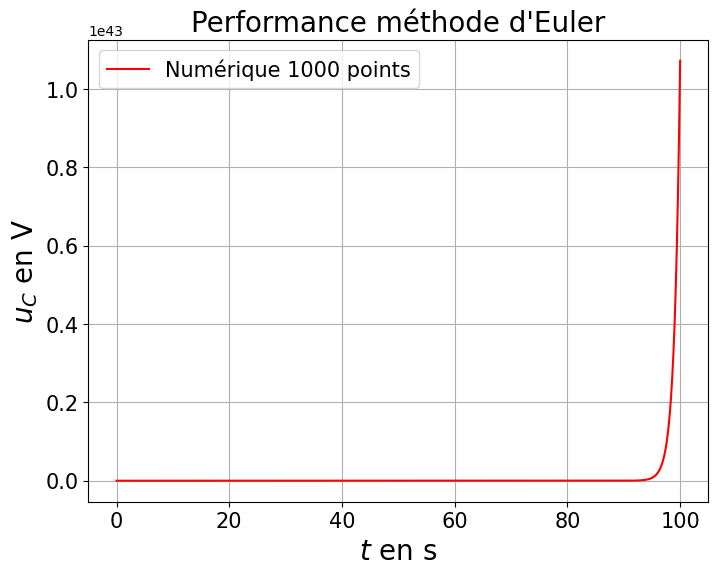

In [16]:
plt.figure(figsize=(8, 6))
plt.grid()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.xlabel('$t$ en s', fontsize=20)
plt.ylabel('$u_C$ en V', fontsize=20)

plt.plot(list_t, list_y,
         'r', label=f'Numérique {n} points')

plt.title("Performance méthode d'Euler",
          fontsize=20)
plt.legend(fontsize=15)
plt.show()

:::{note} Points
.5
:::